# Linear Regression without using sklearn and using Sklearn

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Training Data
train = pd.read_csv("train.csv")

# Testing Data
test = pd.read_csv("test.csv")


In [2]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [6]:
# Checking null values 
train.isnull().sum()

x    0
y    1
dtype: int64

Train data has one null value in y column

In [7]:
test.isnull().sum()

x    0
y    0
dtype: int64

Test data has no null value

In [8]:
train.replace('',float('NaN'),inplace=True)
train.dropna(inplace=True)

Checking if any null values are left

<AxesSubplot:>

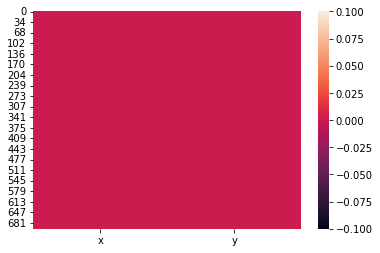

In [9]:
sns.heatmap(train.isnull())

In [10]:
# Training Data
x_train = train["x"].values.reshape(-1,1)
y_train = train["y"].values.reshape(-1,1)

In [11]:
# Testing Data
x_test = test["x"].values.reshape(-1,1)
y_test = test["y"].values.reshape(-1,1)

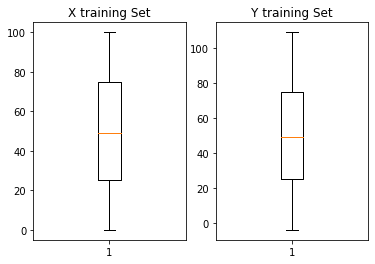

In [12]:
# finding Outliers in training set
plt.subplot(1,2,1)
plt.title("X training Set")
plt.boxplot(x_train)

plt.subplot(1,2,2)
plt.title("Y training Set")
plt.boxplot(y_train)
plt.show()

### No outliers found in data

In [13]:
# Setting learning rate and number of iteration
# h(x) = theta_0 + theta_1 * x

alpha = 0.0001
iterations = 100

#theta[0] = bias
#theta[1] = weight
theta = [0,0]

In [14]:
def h_theta(x,y,theta):
    return (theta[0] + theta[1] * x - y)


def cost_function(x_train,y_train,theta):
    h = 0
    for i in range(len(x_train)):
        h += (h_theta(x_train[i], y_train[i],theta))**2
    return h / (2 * len(x_train))


def gradient_descent(x_train,y_train,theta,alpha):
    m = len (x_train)
    sum_i = 0
    sum_j = 0
    
    for i in range(m):
        sum_i += h_theta(x_train[i], y_train[i],theta)
        sum_j += x_train[i]*(h_theta(x_train[i], y_train[i],theta))

    theta_i = theta[0] - alpha * (sum_i) / m
    theta_j = theta[1] - alpha * (sum_j) / m
    updated_theta = [theta_i, theta_j]
    return updated_theta         


def Linear_Reg(x_train,y_train,alpha,iteration):
    m = len (x_train)
    theta = [0,0]
    cost=[]
    
    for i in range(iteration):
        theta = gradient_descent(x_train,y_train,theta,alpha)
        cost.append(cost_function(x_train,y_train,theta))
        
    return theta

In [15]:
Linear_Reg(x_train,y_train,alpha,iterations)

[array([0.01465811]), array([0.99882975])]

In [16]:
# using the above value to test data





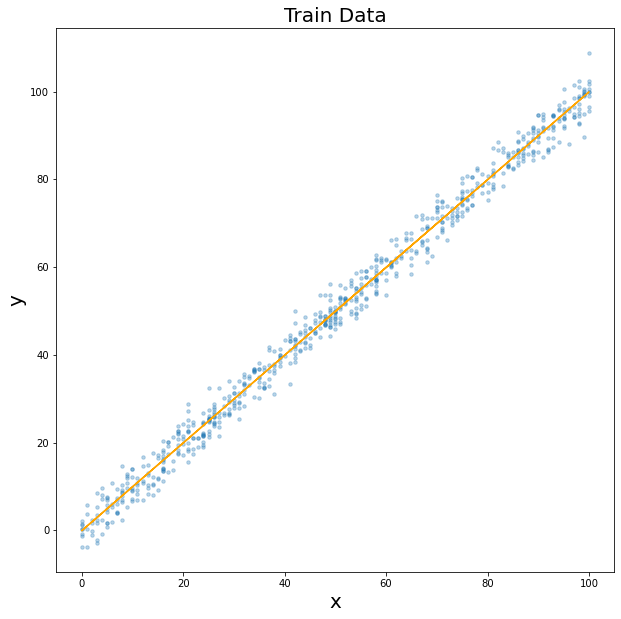

accuracy: 0.9907015319025518


In [17]:
#Linear Regression using Scikit

# Select the linear model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(x_train, y_train)

# Make prediction
prediction = lin_reg.predict(x_test)

# Visualize the data
plt.figure(figsize=(10, 10))
plt.title("Train Data", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)

plt.scatter(x_train, y_train, s=12, alpha = 0.3)
plt.plot(x_test, prediction, color="orange")
plt.show()

accuracy = lin_reg.score(x_train, y_train)
print('accuracy:',accuracy)